# Clasifying Tweet sentiments


© Explore Data Science Academy

In [1]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
pd.set_option('display.max_rows', 100)

from nltk.corpus import stopwords
from sklearn.metrics import classification_report

# set plot style
sns.set()

In [2]:
df = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/Classification/Advanced_Classification_Predict-student_data-2780/train.csv')
df_test = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/Classification/Advanced_Classification_Predict-student_data-2780/test_with_no_labels.csv')

In [3]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df.shape

(15819, 3)

In [4]:
v = df['message']
c = [i for i in v]
for i in range(50):
    print(str(i) +')' + c[i] +'\n')

0)PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable

1)It's not like we lack evidence of anthropogenic global warming

2)RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…

3)#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD

4)RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight

5)Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j

6)RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R

7)RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦

8)@AceofSpadesHQ My 8yo 

In [27]:
reg = '\#[A-Za-z0-9#?_]+'
w = '#TodayinMaker_775# WIRED : 2016 was a pivotal #Resist #Impeach year in the war on climate change https://t.co/44wOTxTLcD'
re.findall(reg,w)

['#TodayinMaker_775#', '#Resist', '#Impeach']

In [14]:
reg = r'https:[/?t?.*?]+'
w = ')RT @TheTorontoSun: @AceofSpadesHQ From https://t.… @sunlorri55_e: @realDonaldTrump @Jnp_Ftw #TodayinMaker_775# WIRED @taylorswift13 : https://… 2016 was a pivotal #Resist #Impeach year Indian https://t.co/nSOimuwEax environmentalist calls  out DiCaprio in his own documentary on climate change. RT @washingtonpost: The Alaskan tundra is filling the atmosphere with carbon dioxide, worsening climate change https://t.co/nSOimuwEax Ã¢â‚¬Â¦'
re.findall(reg,w)

['https://t.', 'https://', 'https://t.', 'https://t.']

In [6]:
type_labels = list(df.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


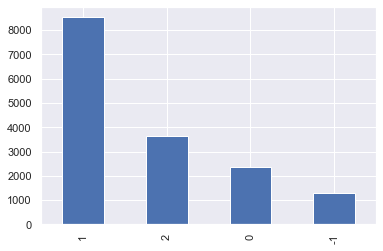

In [15]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [8]:
from nltk.corpus import stopwords

In [16]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
#remmoving the urls
pattern_url = r'http[s]?://t.co/[A-Za-z0-9]+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [18]:
#remmoving the RT mentions 
pattern_url = r'RT\s\@[A-Za-z0-9_]+:'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [19]:
#remmoving the mentions 
pattern_url = r'@[A-Za-z0-9_]+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [20]:
#remmoving the Hashtags 
pattern_url = r'\#[A-Za-z0-9#?_]+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [21]:
#remmoving the remaining https
pattern_url = r'https:[.*?]+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [23]:
# turning all tweets to lower case
df['message'] = df['message'].str.lower()

In [24]:
# importing punctuations
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
# punctuation remover function
def remove_punctuation(tweets):
    return ''.join([l for l in tweets if l not in string.punctuation])

In [26]:
# using apply method to remove the punctuation marks
df['message'] = df['message'].apply(remove_punctuation)

In [27]:
#creating a function for removing emojis
import re
def remove_emoji(string):
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [28]:
# Removing the emojis using the apply method
df['message'] = df['message'].apply(remove_emoji)

# Tokenization

In [29]:
# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [30]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

In [31]:
df.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ..."
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c..."


# The Stemmatization

In [32]:
#importing stemmer library
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [33]:
#Stemmer function
def token_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [34]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')
df['stem'] = df['tokens'].apply(token_stemmer, args=(stemmer, ))

In [35]:
stems = [i for i in df['stem']]
stems[0]

['polyscimajor',
 'epa',
 'chief',
 'doesnt',
 'think',
 'carbon',
 'dioxid',
 'is',
 'main',
 'caus',
 'of',
 'global',
 'warm',
 'and',
 'wait',
 'what',
 'urlweb',
 'via']

# The Lemmatization

In [37]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [38]:
def tweet_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [39]:
df['lemma'] = df['tokens'].apply(tweet_lemma, args=(lemmatizer, ))

In [40]:
df.head()

,sentiment,message,tweetid,tokens,stem,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wired, 2016, wa, a, pivotal, year, in, the, w..."
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, 2016, and, a, racist, sexist, climate, ch..."


# removing the stop words

In [41]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [42]:
df['no_stop_words'] = df['tokens'].apply(remove_stop_words)

In [43]:
df.head()

,sentiment,message,tweetid,tokens,stem,lemma,no_stop_words
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evidence, of, anthro...","[like, lack, evidence, anthropogenic, global, ..."
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,...","[research, say, we, have, three, year, to, act...","[researcher, say, we, have, three, year, to, a...","[researchers, say, three, years, act, climate,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wire, 2016, was, a, pivot, year, in, the, war...","[wired, 2016, wa, a, pivotal, year, in, the, w...","[wired, 2016, pivotal, year, war, climate, cha..."
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, 2016, and, a, racist, sexist, climate, ch...","[2016, racist, sexist, climate, change, denyin..."


In [44]:
df['no_stop_words_lemma'] = df['no_stop_words'].apply(tweet_lemma, args=(lemmatizer, ))

In [89]:
c = [i for i in df['message']]
c[:500]

['polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via ',
 'its not like we lack evidence of anthropogenic global warming',
 ' researchers say we have three years to act on climate change before it’s too late urlweb urlweb…',
 ' wired  2016 was a pivotal year in the war on climate change urlweb',
 ' its 2016 and a racist sexist climate change denying bigot is leading in the polls ',
 'worth a read whether you do or dont believe in climate change urlweb urlweb',
 ' mike pence doesn’t believe in global warming or that smoking causes lung cancer urlweb',
 ' six big things we can all do today to fight climate change or how to be a climate activistã¢â‚¬â¦ urlweb hã¢â‚¬â¦',
 ' my 8yo nephew is inconsolable he wants to die of old age like me but will perish in the fiery hellscape of climate change',
 ' no offense… but like… how do you just not believe… in global warming………',
 ' shes thinking about how shes going to die because your husban

# Creating n grams


In [126]:
from nltk.util import ngrams
def ngramconvert(df,n=3):
    for item in df.columns:
        df['new_'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df

In [127]:
new_df = ngramconvert(df[['message']],2)
new_df.head()

<ipython-input-126-90e7a73cb71e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))


,message,new_message
0,polyscimajor epa chief doesnt think carbon dio...,"[(polyscimajor, epa), (epa, chief), (chief, do..."
1,its not like we lack evidence of anthropogenic...,"[(its, not), (not, like), (like, we), (we, lac..."
2,researchers say we have three years to act on ...,"[(researchers, say), (say, we), (we, have), (h..."
3,wired 2016 was a pivotal year in the war on ...,"[(wired, 2016), (2016, was), (was, a), (a, piv..."
4,its 2016 and a racist sexist climate change de...,"[(its, 2016), (2016, and), (and, a), (a, racis..."


# Creating the bag of words


In [46]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [47]:
type_labels = list(df.sentiment.unique())
type_labels

[1, 2, 0, -1]

In [48]:
beliver = {}
for pp in type_labels:
    df_label = df.groupby('sentiment')
    beliver[pp] = {}
    for row in df_label.get_group(pp)['no_stop_words_lemma']:
        beliver[pp] = bag_of_words_count(row, beliver[pp])

In [49]:
beliver

{1: {'polyscimajor': 1,
  'epa': 249,
  'chief': 68,
  'doesnt': 718,
  'think': 452,
  'carbon': 97,
  'dioxide': 38,
  'main': 25,
  'cause': 148,
  'global': 1594,
  'warming': 1413,
  'wait': 25,
  'urlweb': 3190,
  'via': 182,
  'like': 275,
  'lack': 15,
  'evidence': 72,
  'anthropogenic': 10,
  'wired': 2,
  '2016': 52,
  'pivotal': 3,
  'year': 213,
  'war': 68,
  'climate': 7163,
  'change': 7006,
  'racist': 33,
  'sexist': 13,
  'denying': 121,
  'bigot': 11,
  'leading': 60,
  'poll': 5,
  'worth': 12,
  'read': 71,
  'whether': 33,
  'dont': 341,
  'believe': 1001,
  'mike': 8,
  'penny': 13,
  'doesn’t': 12,
  'smoking': 5,
  'lung': 5,
  'cancer': 3,
  'six': 11,
  'big': 89,
  'thing': 176,
  'today': 118,
  'fight': 292,
  'activistã¢â‚¬â¦': 1,
  'hã¢â‚¬â¦': 9,
  '8yo': 1,
  'nephew': 1,
  'inconsolable': 1,
  'want': 201,
  'die': 394,
  'old': 48,
  'age': 34,
  'perish': 1,
  'fiery': 1,
  'hellscape': 1,
  'offense…': 1,
  'like…': 1,
  'believe…': 2,
  'warming……

In [50]:
all_words = set()
for pp in type_labels:
    for word in beliver[pp]:
        all_words.add(word)

In [51]:
all_words

{'knowamp',
 'ecological',
 'special',
 'invited',
 'hubby',
 'airtime',
 'rakhmanin',
 'clean',
 '19',
 'religio…',
 'literature',
 'upgrading',
 'not…',
 '‘the',
 'final',
 'facilitate',
 'ronald',
 'meã¢â‚¬â¦',
 'appeases',
 'globalism',
 'decryption',
 'melted',
 'shifted',
 'barry',
 'executive',
 'ive',
 'blunt',
 'stuf…',
 'replaces',
 'lt',
 'adanis',
 'beloved',
 'scandinavia',
 'debate”',
 'canceled',
 'it—climate',
 'typical',
 'mideast',
 'birdseye',
 'reduce',
 'briefing',
 'morroco',
 'karma',
 'coauthored',
 'effectsã¢â‚¬â¦',
 'lifiting',
 'guy’',
 'manila',
 'fuck',
 'jibberish',
 'avuto',
 'fossili',
 'warmth…',
 'higher',
 '“our',
 'highliterally',
 'airline',
 'transmission',
 'absolute',
 'jew…',
 'proving',
 'atmosphere…',
 'defender',
 'muslimamerican',
 'clown',
 'dream',
 'dellambiente',
 'ptsd',
 'asserting',
 'populism',
 '“this',
 'democrat',
 'jmjc',
 'echoed',
 'worked',
 'faced',
 'delivering',
 'achieve',
 'doral',
 'disagrees',
 'consideration',
 'conclu

In [52]:
beliver['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in beliver[pp].keys():
            if word in beliver['all']:
                beliver['all'][word] += beliver[pp][word]
            else:
                beliver['all'][word] = beliver[pp][word]

In [53]:
beliver['all']

{'ecological': 8,
 'special': 19,
 'invited': 6,
 'airtime': 2,
 'clean': 76,
 '19': 12,
 'literature': 2,
 'upgrading': 1,
 'not…': 6,
 'final': 14,
 'appeases': 1,
 'decryption': 1,
 'melted': 7,
 'shifted': 4,
 'executive': 56,
 'ive': 31,
 'stuf…': 1,
 'replaces': 2,
 'lt': 2,
 'beloved': 3,
 'scandinavia': 1,
 'debate”': 2,
 'canceled': 12,
 'it—climate': 1,
 'typical': 3,
 'reduce': 34,
 'coauthored': 2,
 'effectsã¢â‚¬â¦': 1,
 'lifiting': 1,
 'manila': 1,
 'fuck': 67,
 'jibberish': 1,
 'higher': 13,
 '“our': 1,
 'airline': 3,
 'transmission': 1,
 'absolute': 4,
 'jew…': 1,
 'proving': 6,
 'defender': 1,
 'clown': 2,
 'dream': 4,
 'ptsd': 9,
 'asserting': 1,
 'populism': 3,
 '“this': 1,
 'democrat': 43,
 'jmjc': 1,
 'echoed': 1,
 'worked': 14,
 'faced': 4,
 'delivering': 1,
 'achieve': 4,
 'doral': 1,
 'disagrees': 2,
 'resolution': 6,
 'degree': 109,
 'earning': 1,
 'without': 72,
 'argue': 16,
 'adaptation': 30,
 'private': 17,
 'horrible': 10,
 'property': 9,
 'science': 412,
 

In [54]:
total_words = sum([v for v in beliver['all'].values()])
total_words

168554

Text(0.5, 0, 'word frequency')

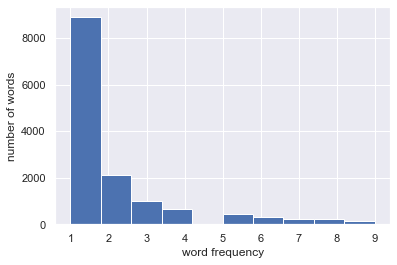

In [232]:
_ = plt.hist([v for v in beliver['all'].values() if v < 10],bins=10)
plt.ylabel("number of words")
plt.xlabel("word frequency")

In [55]:
def get_number_of_words(value):
    return len([v for v in beliver['all'].values() if v == value])

In [56]:
get_number_of_words(2)

2093

In [57]:
def get_rare_words(value, start , stop):
    rare_words = [k for k, v in beliver['all'].items() if v==value] 
    print(rare_words[start:stop])

In [58]:
get_rare_words(9, 100, 200)

['changedenying', 'worrying', 'more…', 'gtgt', 'option', 'oppose', 'cuz', 'core', 'defeat', 'strike', 'father', 'range', '98', 'bleaching', 'usled', 'arguing', 'hack', 'wing', 'mining', 'expensive', 'scheme', 'quality', 'hunt', 'tap', 'service', 'coffee', 'breathe', 'mail', 'wind', 'willing', 'test', 'mar', 'be…', 'heatwaves', 'round', 'outpace', 'largely', 'disprove', 'awful', 'seven', 'invest', 'alter', 'standard', 'rose', 'poster', 'hundred', 'cbs', 'reveals', 'garage', 'ge', 'oxford']


In [59]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in beliver['all'].values() if v >= 10]))
occurs_more_than_10_times = sum([v for v in beliver['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2075
140970


In [237]:
b

0.8358682101513802

In [60]:
max_count = 10
remaining_word_index = [k for k, v in beliver['all'].items() if v > max_count]

In [61]:
hm = []
for p, p_bow in beliver.items():
    df_bow = pd.DataFrame([(k, v) for k, v in p_bow.items() if k in remaining_word_index], columns=['Word', p])
    df_bow.set_index('Word', inplace=True)
    hm.append(df_bow)

# create one big dataframe
df_bow = pd.concat(hm, axis=1)
df_bow.fillna(0, inplace=True)

In [66]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [85]:
df_bow['perc4'] = (df_bow[-1] / df_bow['all']) * 100

In [91]:
df_bow.sort_values(by=[ 'all'  ], ascending=False)

,1,2,0,-1,all,perc,perc2,perc3,perc4
Word,,,,,,,,,
climate,7163.0,3192.0,1420.0,777.0,12552,57.066603,25.430210,11.312938,6.190249
change,7006.0,3156.0,1382.0,741.0,12285,57.028897,25.689866,11.249491,6.031746
urlweb,3190.0,3629.0,757.0,459.0,8035,39.701307,45.164904,9.421282,5.712508
global,1594.0,501.0,1033.0,632.0,3760,42.393617,13.324468,27.473404,16.808511
warming,1413.0,426.0,993.0,598.0,3430,41.195335,12.419825,28.950437,17.434402
trump,1008.0,968.0,163.0,59.0,2198,45.859873,44.040036,7.415833,2.684258
believe,1001.0,21.0,87.0,45.0,1154,86.741768,1.819757,7.538995,3.899480
u,510.0,294.0,129.0,67.0,1000,51.000000,29.400000,12.900000,6.700000
amp,654.0,35.0,101.0,83.0,873,74.914089,4.009164,11.569301,9.507446


# Count Vectoriser

In [294]:
from sklearn.feature_extraction.text import CountVectorizer

In [295]:
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X1 = df['message']
y = df['sentiment']

In [296]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y,test_size=0.2,
random_state=53)

In [299]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train1 = count_vectorizer.fit_transform(X_train1.values)
count_test1 = count_vectorizer.transform(X_test1.values)

# unscaled model predictions

In [300]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


y = df['sentiment']
X = df['message']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [301]:
count_train.shape

(12655, 26953)

In [302]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.7133375474083439

# tuned hypeparameters


In [303]:
# Import the var thresh model and choose a threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.02)

# Transform (i.e.: run selection on) the training data
X_train_vt = selector.fit_transform(count_train)
X_test_vt = selector.transform(count_test)

In [304]:
X_test_vt.shape

(3164, 31)

In [305]:
nb_classifier2 = MultinomialNB()
nb_classifier2.fit(X_train_vt, y_train)

pred1 = nb_classifier2.predict(X_test_vt)

In [306]:
metrics.accuracy_score(y_test, pred1)

0.5919721871049305

# Scaled Models


In [307]:
# Import the scaler module
from sklearn import preprocessing
scale
# Scale datar = preprocessing.MaxAbsScaler()

X_scaled_train = scaler.fit_transform(count_train)
X_scaled_test = scaler.fit_transform(count_test)

In [308]:
X_scaled_train.shape

(12655, 26953)

In [309]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

s_nb_classifier = MultinomialNB()

In [310]:
snb_classifier.fit(X_scaled_train, y_train)

MultinomialNB()

In [311]:
pred2 = nb_classifier.predict(X_scaled_test)
metrics.accuracy_score(y_test, pred2)

0.7177623261694058

In [312]:
print('Full Model')
print(classification_report(y_test, pred, target_names= [ '1',  '2',  '0', '-1']))

print('Var Thresh Model 0.02')
print(classification_report(y_test, pred1, target_names= [ '1',  '2',  '0', '-1']))

print('Scaled Model')
print(classification_report(y_test, pred2, target_names= [ '1',  '2',  '0', '-1']))


Full Model
              precision    recall  f1-score   support

           1       0.89      0.21      0.34       261
           2       0.78      0.19      0.30       455
           0       0.69      0.94      0.79      1720
          -1       0.78      0.69      0.73       728

    accuracy                           0.71      3164
   macro avg       0.78      0.51      0.54      3164
weighted avg       0.74      0.71      0.67      3164

Var Thresh Model 0.02
              precision    recall  f1-score   support

           1       0.31      0.06      0.10       261
           2       0.36      0.38      0.37       455
           0       0.65      0.76      0.70      1720
          -1       0.62      0.52      0.56       728

    accuracy                           0.59      3164
   macro avg       0.48      0.43      0.43      3164
weighted avg       0.57      0.59      0.57      3164

Scaled Model
              precision    recall  f1-score   support

           1       0.83      

In [216]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [313]:
# Import the var thresh model and choose a threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.02)

# Transform (i.e.: run selection on) the training data
sX_train_vt = selector.fit_transform(count_train)
sX_test_vt = selector.transform(count_test)

In [317]:
# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
pX_scaled_train = scaler.fit_transform(sX_train_vt)
pX_scaled_test = scaler.fit_transform(sX_test_vt)

In [319]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

pnb_classifier = MultinomialNB()
pnb_classifier.fit(pX_scaled_train, y_train)



MultinomialNB()

In [321]:
predf = pnb_classifier.predict(pX_scaled_test)
metrics.accuracy_score(y_test, pred)

0.5720606826801518

In [322]:
print('Scaled Model feture')
print(classification_report(y_test, predf, target_names= [ '1',  '2',  '0', '-1']))


Scaled Model feture
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.30      0.02      0.04       455
           0       0.57      0.96      0.71      1720
          -1       0.66      0.21      0.32       728

    accuracy                           0.57      3164
   macro avg       0.38      0.30      0.27      3164
weighted avg       0.50      0.57      0.47      3164



C:\Users\Mpilenhle\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mpilenhle\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mpilenhle\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# Prediction


In [ ]:
lr.fit(x_train, y_t)

preds = lr.predict(x_test)

In [ ]:
daf=pd.DataFrame(preds, columns=['sentiment'])
daf.head()

In [ ]:
output = pd.DataFrame({"time":df_test['time']})
submission1 = output.join(daf)        
submission1.to_csv("submission1.csv", index=False)